In [ ]:
print('hola123')

In [160]:
#imports
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

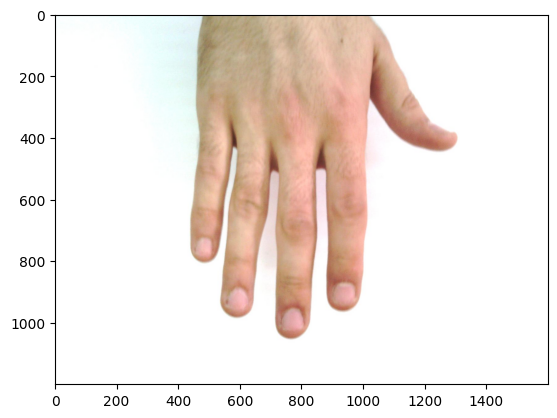

In [161]:
img = mpimg.imread('/home/Projects/dataset/Hands/Hand_0000002.jpg')
imgplot = plt.imshow(img)
plt.show()

In [162]:
csv_path = '/home/Projects/dataset/HandInfo.csv'
df = pd.read_csv(csv_path)
imageName = df['imageName'].values
id = df['id'].values
age = df['age'].values
labels = (id,age)
#print(type(imageName))
#print(df)




In [163]:
dataset_path = '/home/Projects/dataset/Hands/'
ds_train = tf.data.Dataset.from_tensor_slices((imageName,labels))

def read_img(image_file, label):
    image = tf.io.read_file(dataset_path + image_file)
    image = tf.image.decode_image(image, channels=3, dtype=tf.float32)
    return image, label

def augmentation(image, labe):
    return image, labe

ds_train = ds_train.map(read_img).map(augmentation).batch(2)

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
1200


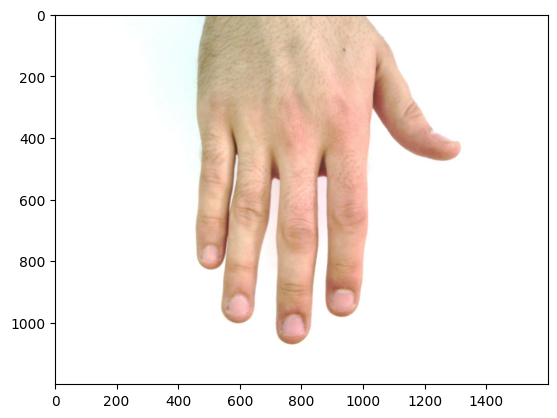

In [164]:
print(type(ds_train))
#print(ds_train)
'''
item[0] es un tensor con todas las imagenes del batch
es de dimensiones item[0][0-BatchSize-1]

item[1] es un tensor con todas los labels del batch
es caso de tener solo un label es de dimensiones item[1][0-BatchSize-1]
en cambio, si tiene mas de un label (ej: is y edad) es de dimensiones item[1][0-CantDeLabels][0-BatchSize-1]
item[1][0] es un tensor con todas los labels de un tipo del batch 
'''
for item in ds_train:
    #print(len(item))
    #print(type(item[1][0]))
    #print(item[1][0])
    print(len(item[0][0]))
    imgplot = plt.imshow(item[0][1])
    plt.show()
    break

